In [66]:
diag = 65 #um

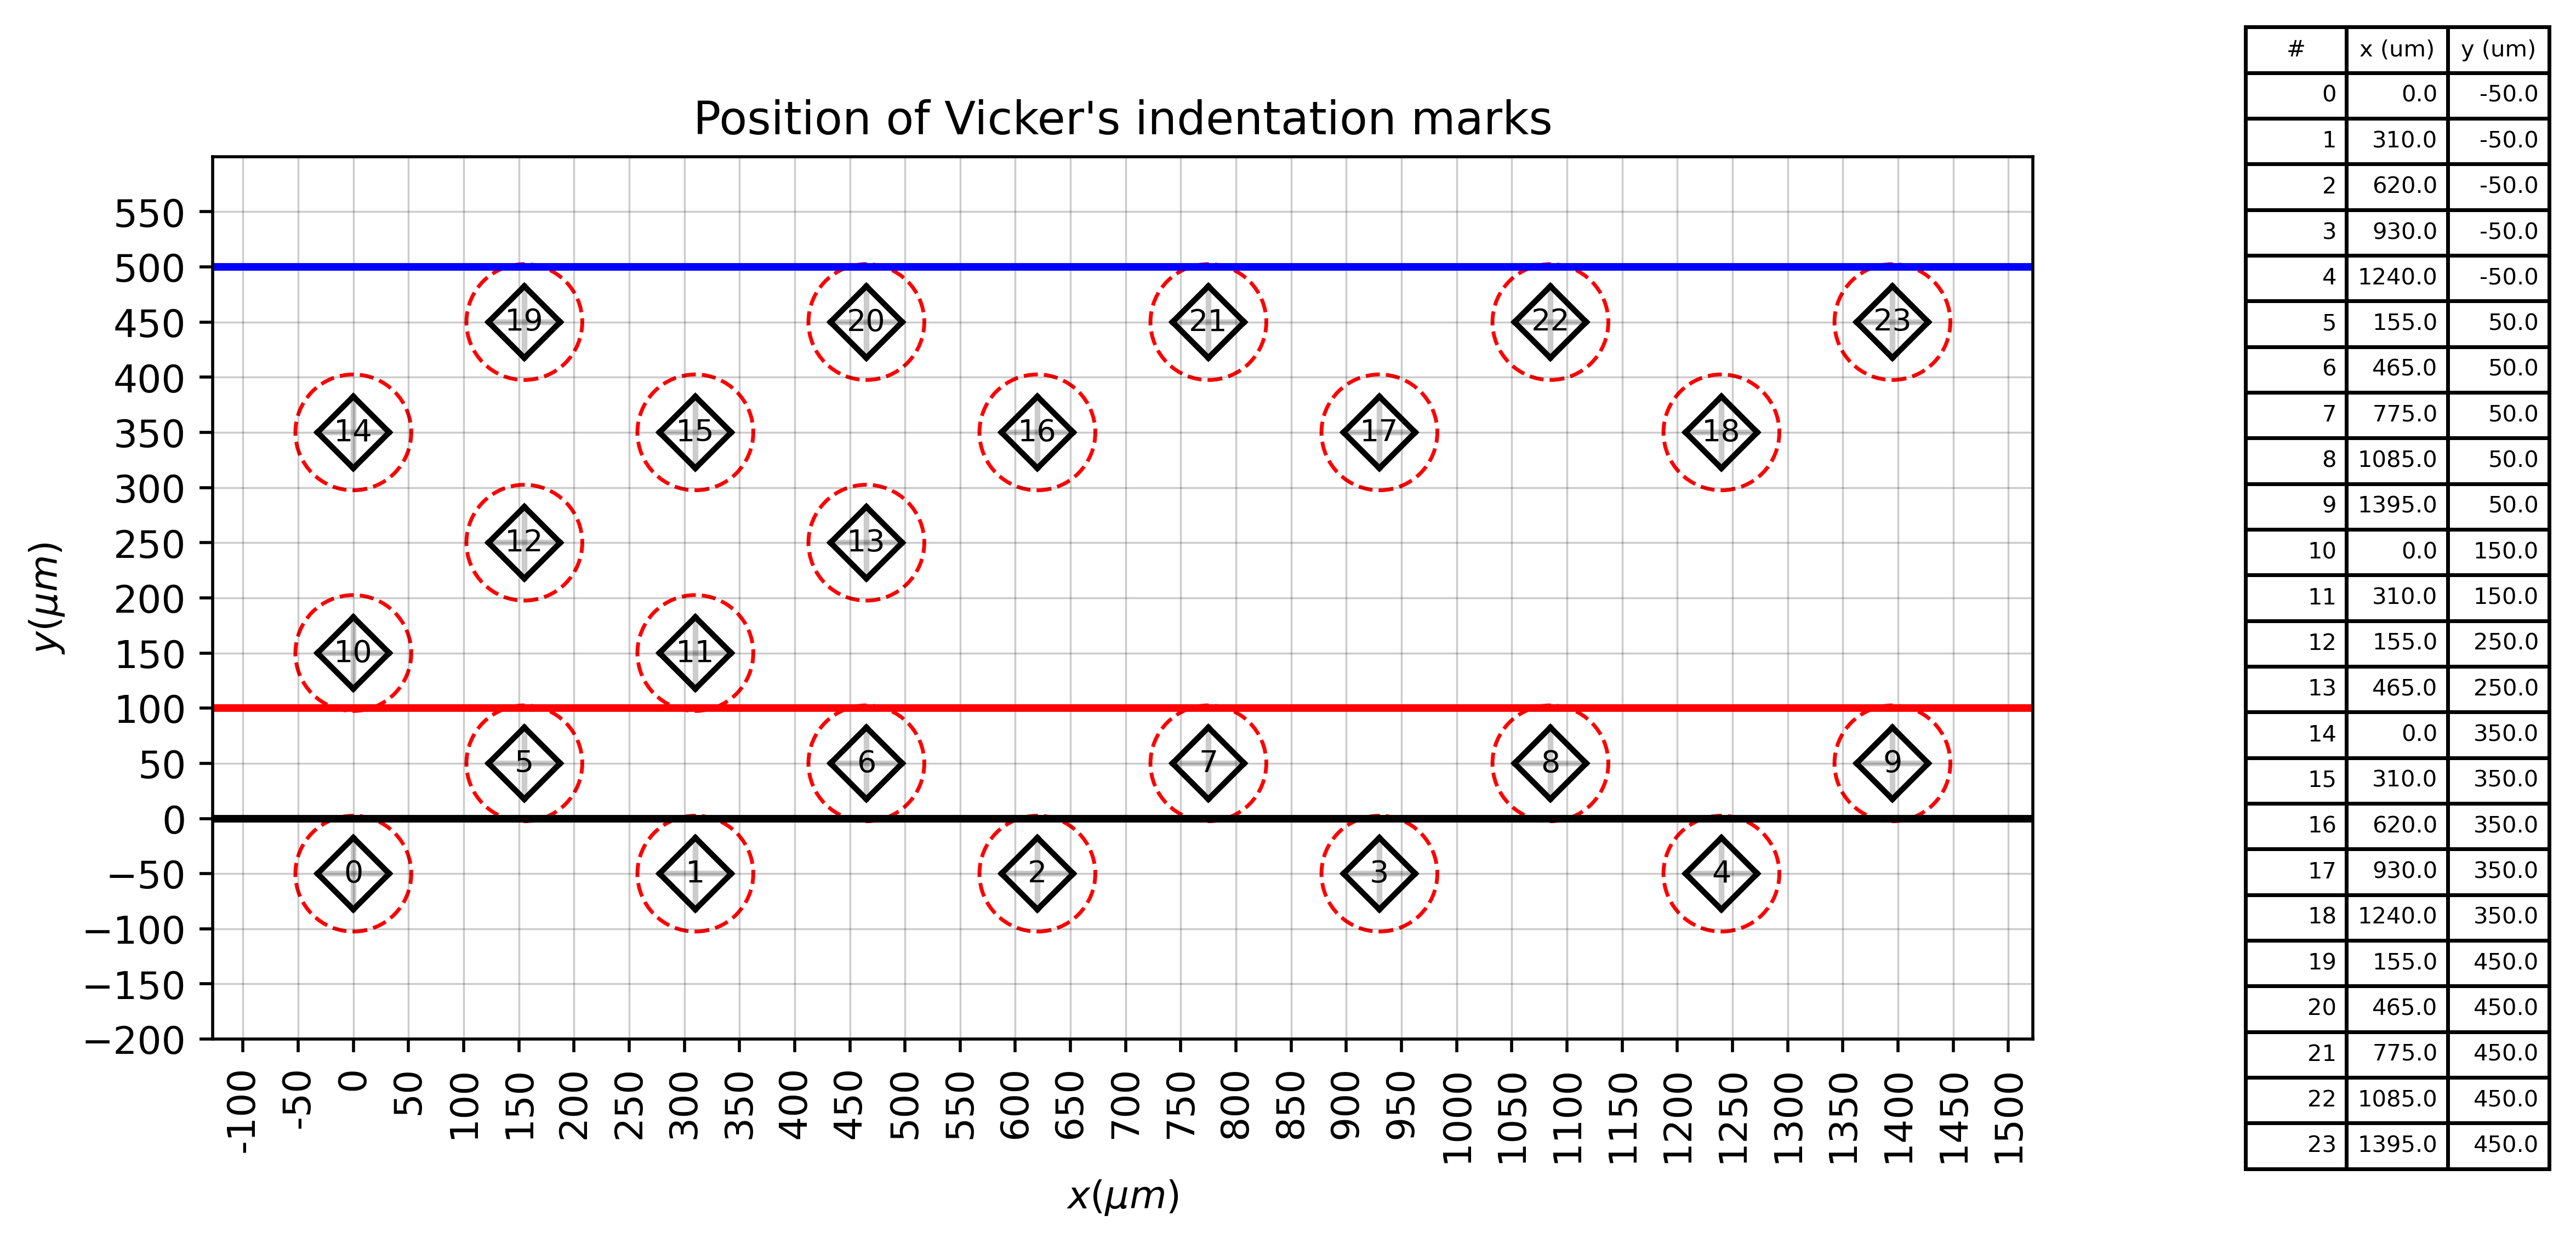

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Figure
fig, (ax, tab) = plt.subplots(1,2, figsize=(11, 5), dpi=500, gridspec_kw = {'width_ratios':[6,1]},squeeze=True)

# Set a grid with size 50 um
ax.set_yticks(np.arange(-200, 600, 50))
ax.set_xticks(np.arange(-200, 1600, 50))
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.2)
ax.set_aspect(1)
ax.set_ylim(-200, 600)

ax.set_xlabel(r"$x \left(\mu{}m\right)$")
ax.set_ylabel(r"$y \left(\mu{}m\right)$")
ax.set_title(r"Position of Vicker's indentation marks")

# Collecting x y data
number = 0
d = {}

def draw_vickers_indentation(ax, diag, x, y):
    global number
    ax.plot([x-diag/2, x],[y, y+diag/2], 'k', alpha=1.0)  # Draw the upper left line.
    ax.plot([x+diag/2, x],[y, y+diag/2], 'k', alpha=1.0)  # Draw the upper right line.  
    ax.plot([x-diag/2, x],[y, y-diag/2], 'k', alpha=1.0)  # Draw the lower left line. 
    ax.plot([x+diag/2, x],[y, y-diag/2], 'k', alpha=1.0)  # Draw the lower right line.    

    ax.plot([x, x],[y+diag/2, y-diag/2], 'k', alpha=0.2)  # Draw the vertical line. 
    ax.plot([x-diag/2, x+diag/2],[y, y], 'k', alpha=0.2)  # Draw the horizontal line.      
    
    ax.text(x,y,number,
            fontsize=8,
            horizontalalignment='center', 
            verticalalignment='center')
 
    ax.add_patch(plt.Circle((x, y), diag/2+20, color='r',fill=False, linestyle='--'))
    d[number] = (int(number),x,y)
    number = number + 1

min_x_dist = np.ceil(np.power((5*diag)**2 - (100)**2,0.5))
[draw_vickers_indentation(ax, diag,              0 + i*min_x_dist, -50) for i in range(5)]
[draw_vickers_indentation(ax, diag,   min_x_dist/2 + i*min_x_dist, +50) for i in range(5)]
[draw_vickers_indentation(ax, diag,              0 + i*min_x_dist, +150) for i in range(2)]
[draw_vickers_indentation(ax, diag,   min_x_dist/2 + i*min_x_dist, +250) for i in range(2)]
[draw_vickers_indentation(ax, diag,              0 + i*min_x_dist, +350) for i in range(5)]
[draw_vickers_indentation(ax, diag,   min_x_dist/2 + i*min_x_dist, +450) for i in range(5)]

ax.axhline(y=0, color='k', linestyle='-',linewidth=2)
ax.axhline(y=100, color='r', linestyle='-',linewidth=2)
ax.axhline(y=500, color='b', linestyle='-',linewidth=2)

# Plot the table
df = pd.DataFrame(d)
df = df.transpose()
df = df.rename(columns={0: "#", 1: "x (um)", 2: "y (um)"})
df["#"] = df["#"].astype(int)
cell_text = []
for row in range(len(df)):
    rowdata = list(df.iloc[row])
    rowdata[0] = int(rowdata[0]) 
    cell_text.append(rowdata)
tab.table(cellText=cell_text, colLabels=df.columns, loc='center')
tab.axis('off')


plt.show()

In [124]:
list(df.iloc[row])

[23.0, 1395.0, 450.0]

Within the thermal spray community, microhardness testing serves as a quantitative method for evaluating the quality of spraying and the integrity of coatings. The presence of defects, such as porosity and non-melted grains, results in a reduction in coating hardness, serving as an initial indicator of wear resistance

